In [44]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from mi_modulo import *

In [39]:
ensayo3_excel = r"C:\Users\jumma\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementinmagery\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Users\jumma\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementinmagery\eeg-motor-movementimagery_Ensayo_04.xlsx"
ensayo5_excel = r"C:\Users\jumma\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementinmagery\eeg-motor-movementimagery_Ensayo_05.xlsx"
ensayo6_excel = r"C:\Users\jumma\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementinmagery\eeg-motor-movementimagery_Ensayo_06.xlsx"
coordenadas_csv = r"C:\Users\jumma\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"

In [40]:
# Construcción de dataframe de coordenadas
eeg_coords = pd.read_csv(coordenadas_csv)
eeg_coords.set_index("canal", drop=True, inplace=True)

In [3]:
ensayo3_dict = pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0)
ensayo4_dict = pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0)
ensayo5_dict = pd.read_excel(ensayo5_excel, sheet_name=None, index_col=0)
ensayo6_dict = pd.read_excel(ensayo6_excel, sheet_name=None, index_col=0)

In [4]:
ensayos3_dfs = lista_dfs(ensayo3_dict)
ensayos4_dfs = lista_dfs(ensayo4_dict)
ensayos5_dfs = lista_dfs(ensayo5_dict)
ensayos6_dfs = lista_dfs(ensayo6_dict)

In [15]:
def df_estadisticos(ensayos_dfs):
    th25, th50, th75, promedio, varianza, mu_sigma = [], [], [], [], [], []
    
    for sujeto in ensayos_dfs:
        data = sujeto.stack().values
        th25.append(np.percentile(data, 25))
        th50.append(np.percentile(data, 50))
        th75.append(np.percentile(data, 75))
        promedio.append(np.mean(data))
        varianza.append(np.var(data))
        mu_sigma.append(np.mean(data) + np.var(data))

    columnas = np.array([th25, th50, th75, promedio, varianza, mu_sigma]).T

    estadisticos_df = pd.DataFrame(
        index=['min', 'max', 'mediana', 'cosa_rara'],
        columns=['th25', 'th50', 'th75', 'promedio', 'varianza', 'mu_sigma']
    )

    estadisticos_df.loc['min'] = columnas.min(axis=0)
    estadisticos_df.loc['max'] = columnas.max(axis=0)
    estadisticos_df.loc['mediana'] = np.median(columnas, axis=0)
    estadisticos_df.loc['cosa_rara'] = stats.median_abs_deviation(columnas, axis=0)

    return estadisticos_df

### Ensayo 3

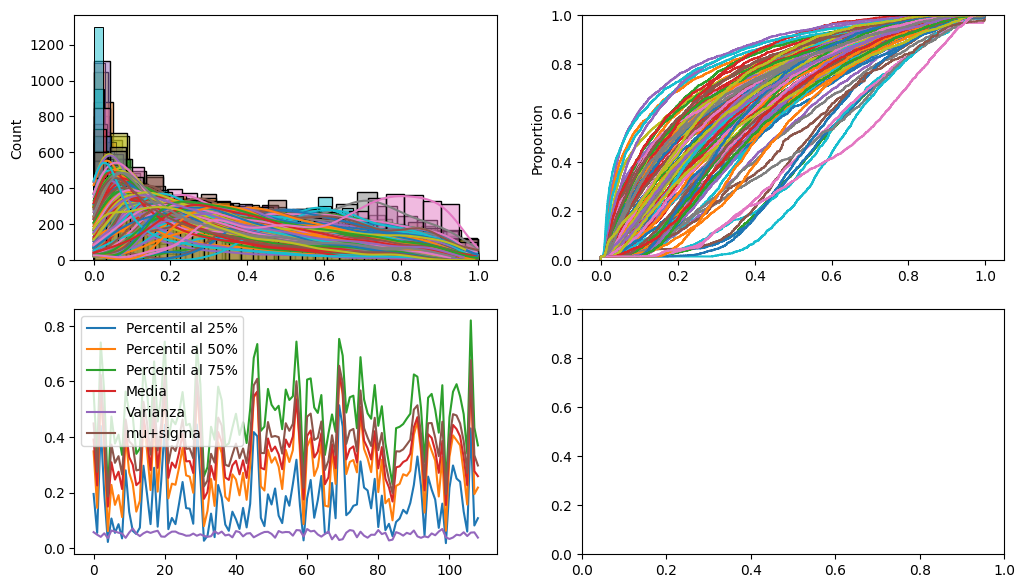

In [10]:
# Análisis para ensayo3
ensayos_dfs = ensayos3_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()

In [16]:
df_estadisticos(ensayos3_dfs)

,th25,th50,th75,promedio,varianza,mu_sigma
min,0.018413,0.06175,0.196867,0.149821,0.028163,0.186222
max,0.514472,0.674805,0.819681,0.626848,0.071038,0.676548
mediana,0.144574,0.273808,0.484181,0.3277,0.051902,0.389466
cosa_rara,0.069559,0.080172,0.074567,0.063494,0.007724,0.060276


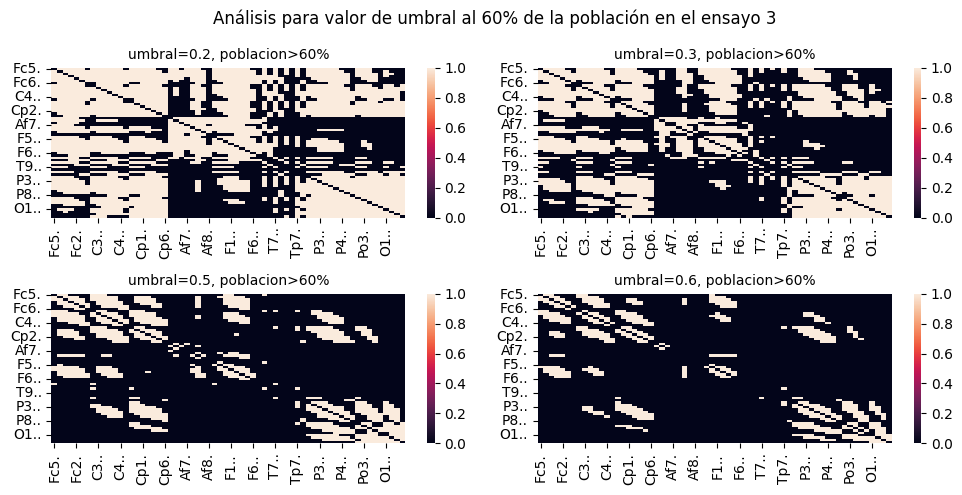

In [74]:
# Análisis para valor de umbral al 60% de la población en el ensayo 3
resultado3_df1 = capsula(ensayos3_dfs, 0.2, 0.6)
resultado3_df2 = capsula(ensayos3_dfs, 0.3, 0.6)
resultado3_df3 = capsula(ensayos3_dfs, 0.5, 0.6)
resultado3_df4 = capsula(ensayos3_dfs, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado3_df1, ax=axes[0, 0])
sns.heatmap(resultado3_df2, ax=axes[0, 1])
sns.heatmap(resultado3_df3, ax=axes[1, 0])
sns.heatmap(resultado3_df4, ax=axes[1, 1])
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
axes[0, 1].set_title('umbral=0.3, poblacion>60%', fontsize=10)
axes[1, 0].set_title('umbral=0.5, poblacion>60%', fontsize=10)
axes[1, 1].set_title('umbral=0.6, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en el ensayo 3')
plt.tight_layout()

Text(0.5, 1.0, 'grafo 2D ensayo 3')

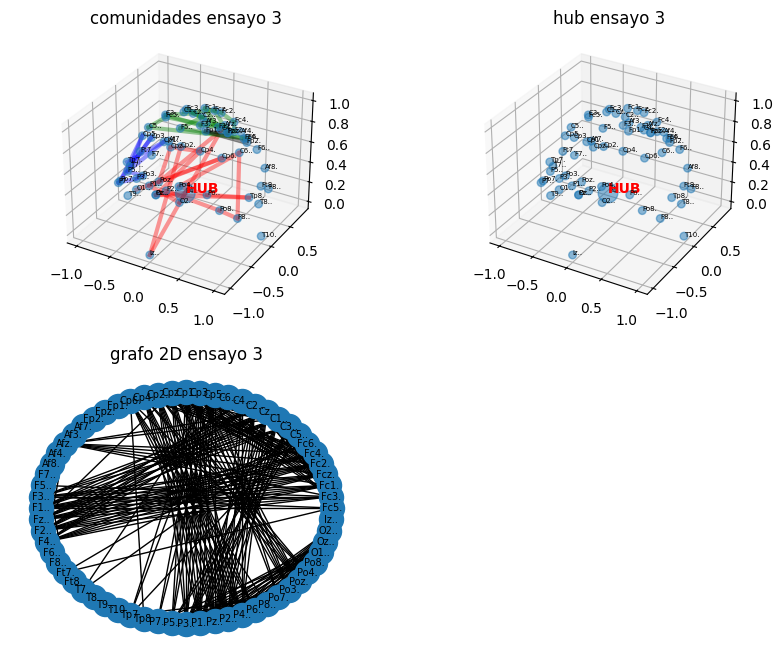

In [53]:
# Convertir de dataframe a grafo
ensayo3_grafo_ = nx.from_pandas_adjacency(resultado3_df4)
# Cálculo de métricas por ensayo
(clust_coeff_3, path_length_3, small_world_sigma_3, communities_3, 
 modularity_3, betwenness_3, global_eff_3, local_eff_3, degree_dict_3) = metricas_grafo(ensayo3_grafo_)
# Grafo de resultados para ensayo 3
hub = betwenness_3[0]
fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]
grafo_comunidades(communities_3, hub, eeg_coords, axes[0])
axes[0].set_title('comunidades ensayo 3')
grafo3D(eeg_coords, hub, axes[1])
axes[1].set_title('hub ensayo 3')
ensayo_grafo = grafo2D(resultado3_df3, axes[2])
axes[2].set_title('grafo 2D ensayo 3')

### Ensayo 4

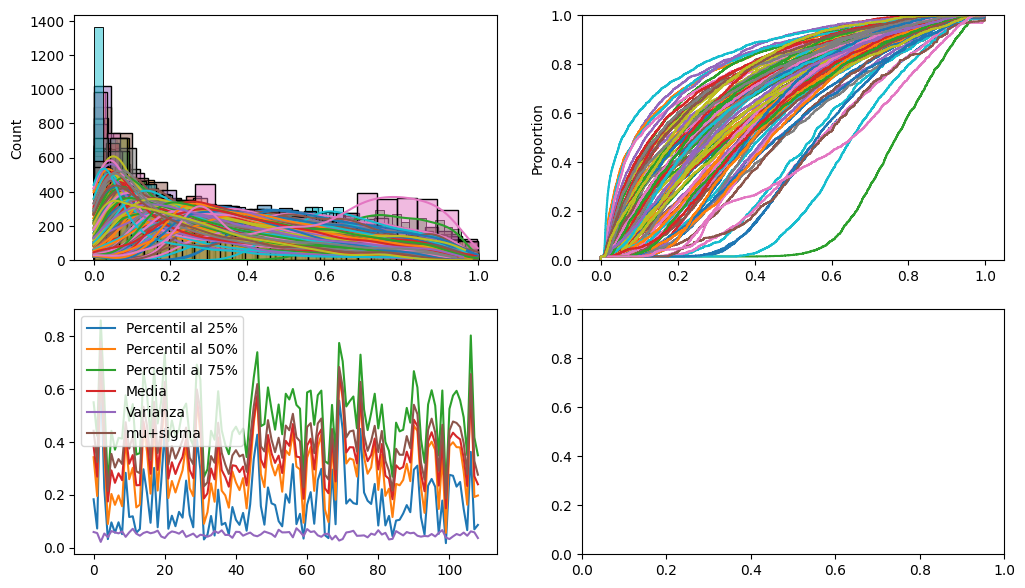

In [6]:
# Análisis para ensayo 4
ensayos_dfs = ensayos4_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()

In [17]:
df_estadisticos(ensayos4_dfs)

,th25,th50,th75,promedio,varianza,mu_sigma
min,0.016915,0.055561,0.210152,0.148728,0.021637,0.186648
max,0.68082,0.768026,0.859416,0.758803,0.073265,0.780441
mediana,0.135265,0.288254,0.480688,0.333706,0.052075,0.384217
cosa_rara,0.066142,0.090804,0.077428,0.068714,0.007063,0.067877


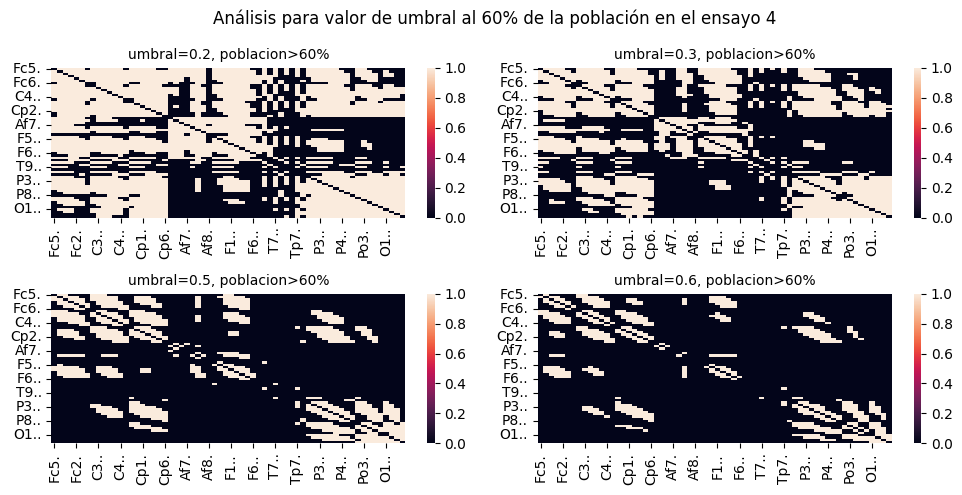

In [73]:
# Análisis para valor de umbral al 60% de la población en el ensayo 4
resultado4_df1 = capsula(ensayos4_dfs, 0.2, 0.6)
resultado4_df2 = capsula(ensayos4_dfs, 0.3, 0.6)
resultado4_df3 = capsula(ensayos4_dfs, 0.5, 0.6)
resultado4_df4 = capsula(ensayos4_dfs, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado4_df1, ax=axes[0, 0])
sns.heatmap(resultado4_df2, ax=axes[0, 1])
sns.heatmap(resultado4_df3, ax=axes[1, 0])
sns.heatmap(resultado4_df4, ax=axes[1, 1])
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
axes[0, 1].set_title('umbral=0.3, poblacion>60%', fontsize=10)
axes[1, 0].set_title('umbral=0.5, poblacion>60%', fontsize=10)
axes[1, 1].set_title('umbral=0.6, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en el ensayo 4')
plt.tight_layout()

Text(0.5, 1.0, 'grafo 2D ensayo 4')

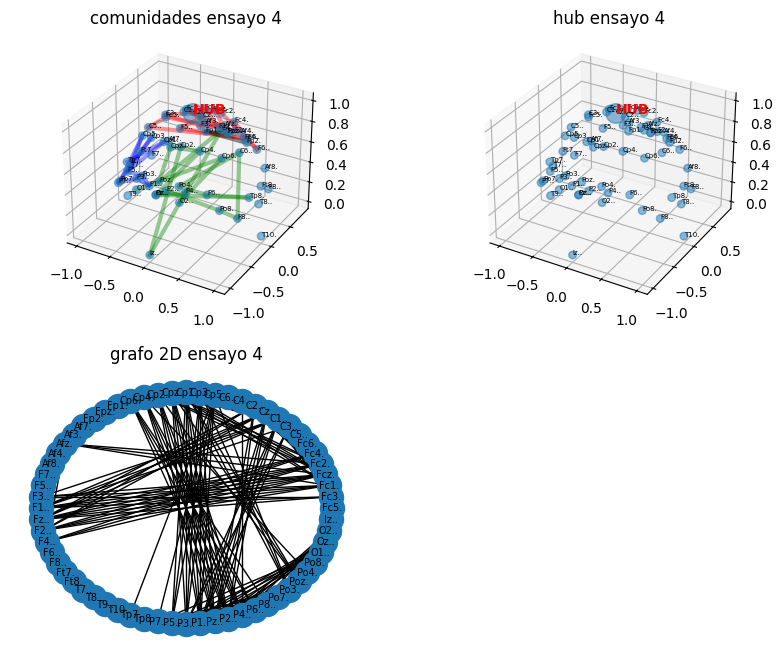

In [52]:
# Convertir de dataframe a grafo
ensayo4_grafo_ = nx.from_pandas_adjacency(resultado4_df4)
# Cálculo de métricas por ensayo
(clust_coeff_4, path_length_4, small_world_sigma_4, communities_4, 
 modularity_4, betwenness_4, global_eff_4, local_eff_4, degree_dict_4) = metricas_grafo(ensayo4_grafo_)
# Grafo de resultados para ensayo 4
hub = betwenness_4[0]
fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]
grafo_comunidades(communities_4, hub, eeg_coords, axes[0])
axes[0].set_title('comunidades ensayo 4')
grafo3D(eeg_coords, hub, axes[1])
axes[1].set_title('hub ensayo 4')
ensayo_grafo = grafo2D(resultado4_df4, axes[2])
axes[2].set_title('grafo 2D ensayo 4')

### Ensayo 5

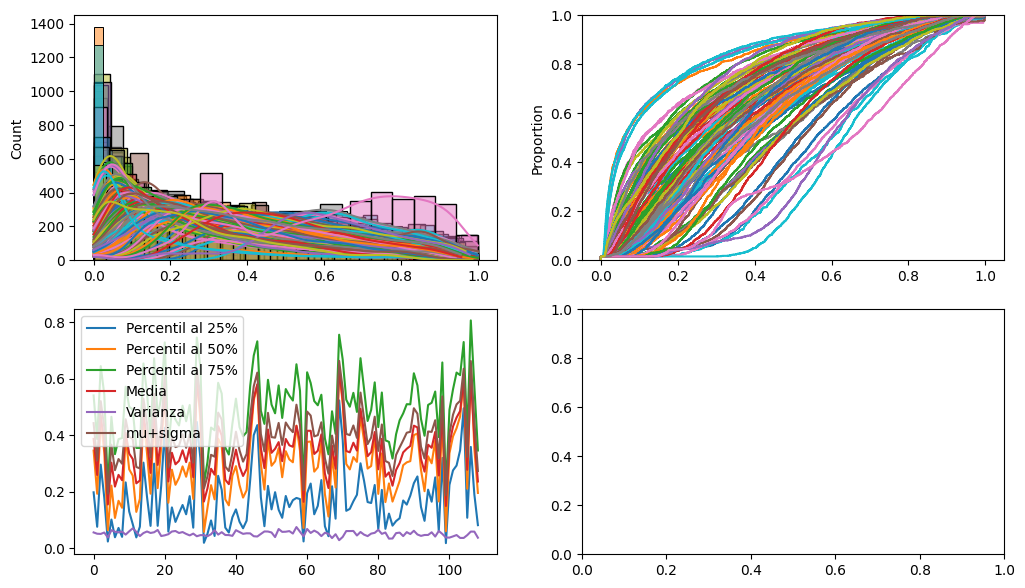

In [7]:
# Análisis para ensayo 5
ensayos_dfs = ensayos5_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()

In [18]:
df_estadisticos(ensayos5_dfs)

,th25,th50,th75,promedio,varianza,mu_sigma
min,0.017846,0.057751,0.205711,0.149197,0.028275,0.187056
max,0.522739,0.651729,0.805549,0.634132,0.07471,0.662407
mediana,0.152787,0.29358,0.500263,0.345151,0.051587,0.399663
cosa_rara,0.0707,0.086319,0.075435,0.066217,0.006488,0.066465


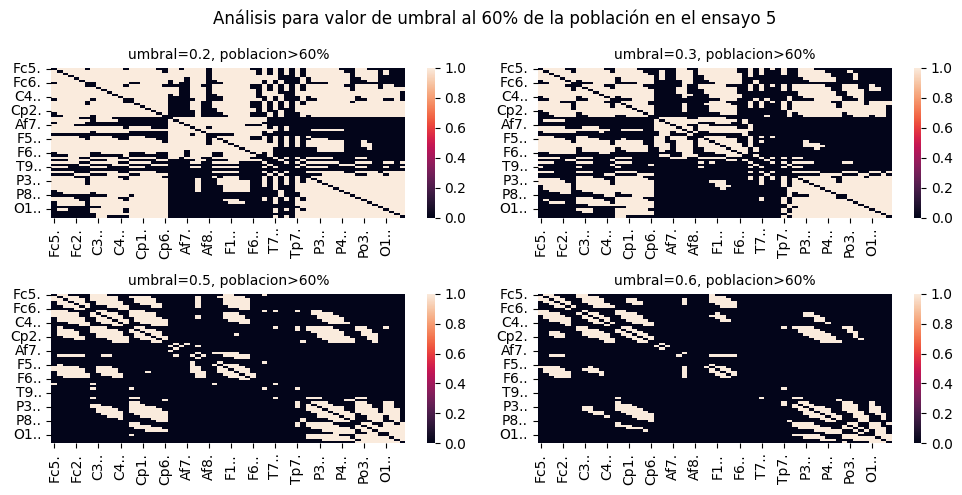

In [72]:
# Análisis para valor de umbral al 60% de la población en el ensayo 5
resultado5_df1 = capsula(ensayos5_dfs, 0.2, 0.6)
resultado5_df2 = capsula(ensayos5_dfs, 0.3, 0.6)
resultado5_df3 = capsula(ensayos5_dfs, 0.5, 0.6)
resultado5_df4 = capsula(ensayos5_dfs, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado5_df1, ax=axes[0, 0])
sns.heatmap(resultado5_df2, ax=axes[0, 1])
sns.heatmap(resultado5_df3, ax=axes[1, 0])
sns.heatmap(resultado5_df4, ax=axes[1, 1])
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
axes[0, 1].set_title('umbral=0.3, poblacion>60%', fontsize=10)
axes[1, 0].set_title('umbral=0.5, poblacion>60%', fontsize=10)
axes[1, 1].set_title('umbral=0.6, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en el ensayo 5')
plt.tight_layout()

Text(0.5, 1.0, 'grafo 2D ensayo 5')

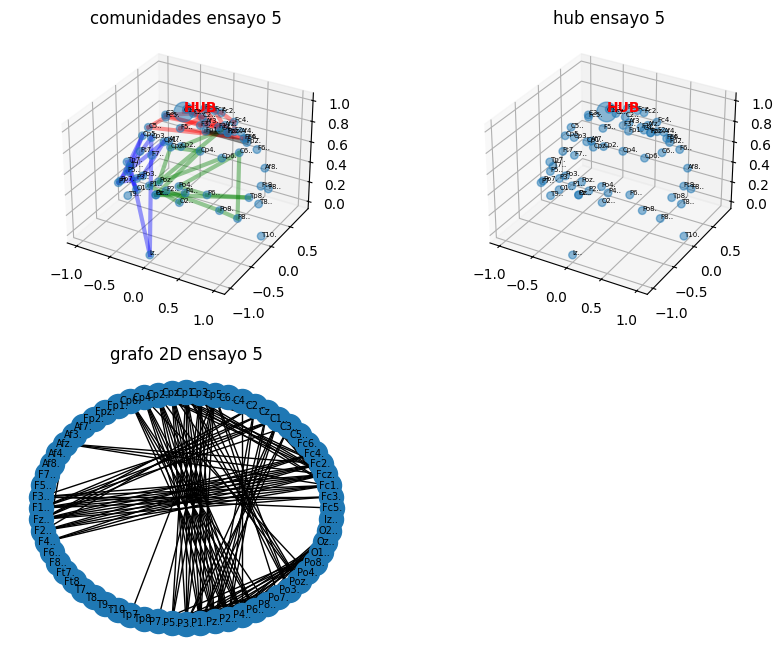

In [51]:
# Convertir de dataframe a grafo
ensayo5_grafo_ = nx.from_pandas_adjacency(resultado5_df4)
# Cálculo de métricas por ensayo
(clust_coeff_5, path_length_5, small_world_sigma_5, communities_5, 
 modularity_5, betwenness_5, global_eff_5, local_eff_5, degree_dict_5) = metricas_grafo(ensayo5_grafo_)
# Grafo de resultados para ensayo 5
hub = betwenness_5[0]
fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]
grafo_comunidades(communities_5, hub, eeg_coords, axes[0])
axes[0].set_title('comunidades ensayo 5')
grafo3D(eeg_coords, hub, axes[1])
axes[1].set_title('hub ensayo 5')
ensayo_grafo = grafo2D(resultado5_df4, axes[2])
axes[2].set_title('grafo 2D ensayo 5')

### Ensayo 6

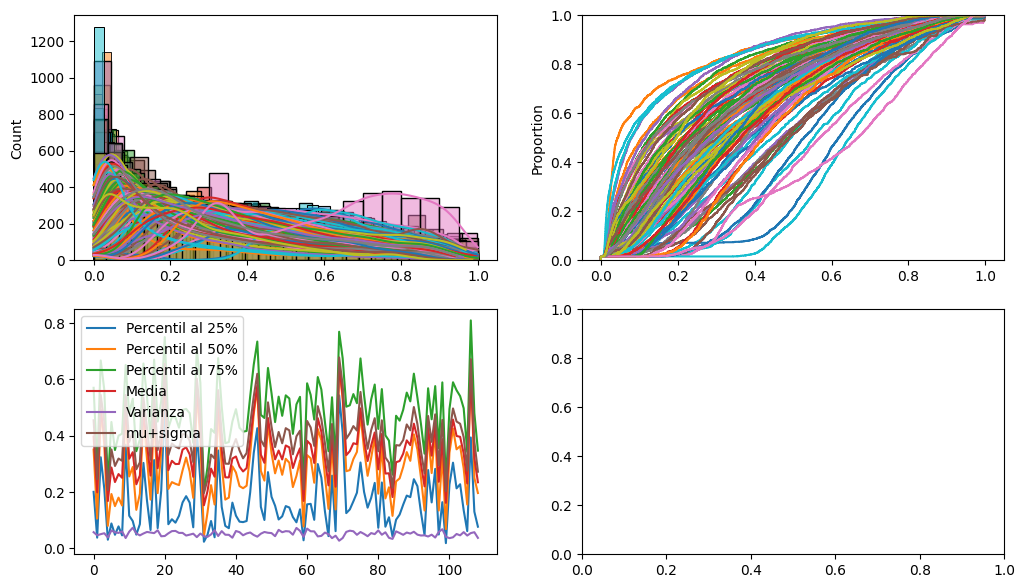

In [8]:
# Análisis para ensayo 6
ensayos_dfs = ensayos6_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()

In [20]:
df_estadisticos(ensayos6_dfs)

,th25,th50,th75,promedio,varianza,mu_sigma
min,0.01875,0.043536,0.202194,0.153129,0.027363,0.196388
max,0.542689,0.667679,0.808475,0.649729,0.073475,0.677091
mediana,0.144532,0.276807,0.493891,0.33342,0.052823,0.389303
cosa_rara,0.061041,0.074638,0.070225,0.058393,0.006397,0.058424


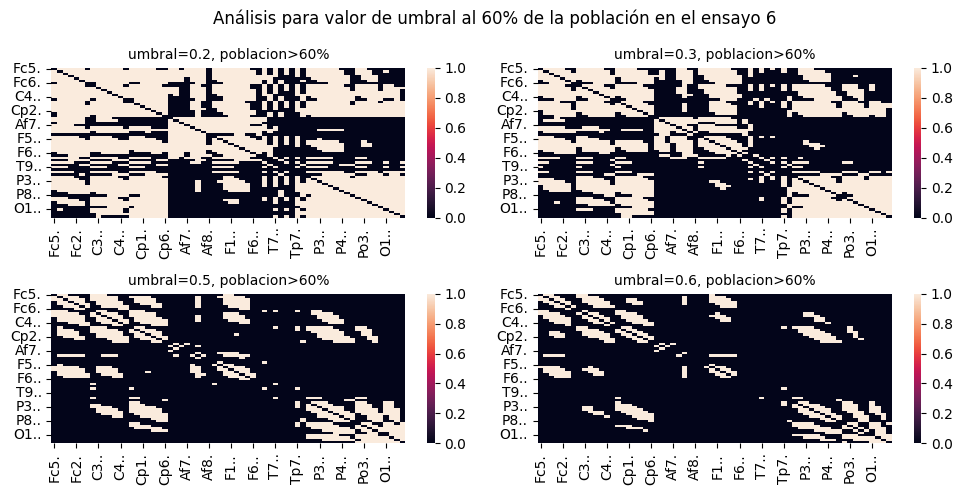

In [71]:
# Análisis para valor de umbral al 60% de la población en el ensayo 6
resultado6_df1 = capsula(ensayos6_dfs, 0.2, 0.6)
resultado6_df2 = capsula(ensayos6_dfs, 0.3, 0.6)
resultado6_df3 = capsula(ensayos6_dfs, 0.5, 0.6)
resultado6_df4 = capsula(ensayos6_dfs, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado6_df1, ax=axes[0, 0])
sns.heatmap(resultado6_df2, ax=axes[0, 1])
sns.heatmap(resultado6_df3, ax=axes[1, 0])
sns.heatmap(resultado6_df4, ax=axes[1, 1])
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)
axes[0, 1].set_title('umbral=0.3, poblacion>60%', fontsize=10)
axes[1, 0].set_title('umbral=0.5, poblacion>60%', fontsize=10)
axes[1, 1].set_title('umbral=0.6, poblacion>60%', fontsize=10)
fig.suptitle('Análisis para valor de umbral al 60% de la población en el ensayo 6')
plt.tight_layout()

Text(0.5, 1.0, 'grafo 2D ensayo 6')

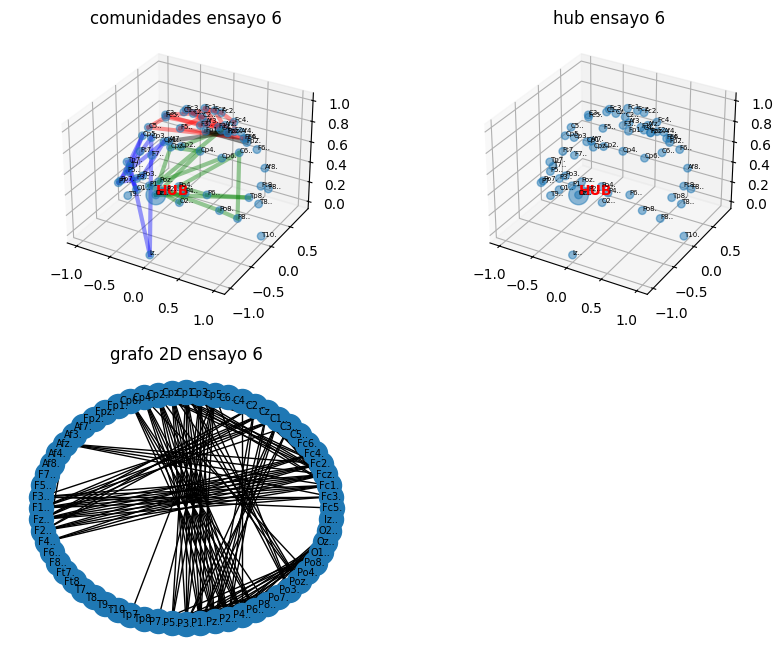

In [50]:
# Convertir de dataframe a grafo
ensayo6_grafo_ = nx.from_pandas_adjacency(resultado6_df4)
# Cálculo de métricas por ensayo
(clust_coeff_6, path_length_6, small_world_sigma_6, communities_6, 
 modularity_6, betwenness_6, global_eff_6, local_eff_6, degree_dict_6) = metricas_grafo(ensayo6_grafo_)
# Grafo de resultados para ensayo 6
hub = betwenness_6[0]
fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]
grafo_comunidades(communities_6, hub, eeg_coords, axes[0])
axes[0].set_title('comunidades ensayo 6')
grafo3D(eeg_coords, hub, axes[1])
axes[1].set_title('hub ensayo 6')
ensayo_grafo = grafo2D(resultado6_df4, axes[2])
axes[2].set_title('grafo 2D ensayo 6')

## Comparación entre ensayos

### Ensayo 3 vs Ensayo 4

Text(0.5, 1.0, 'Ensayo 4')

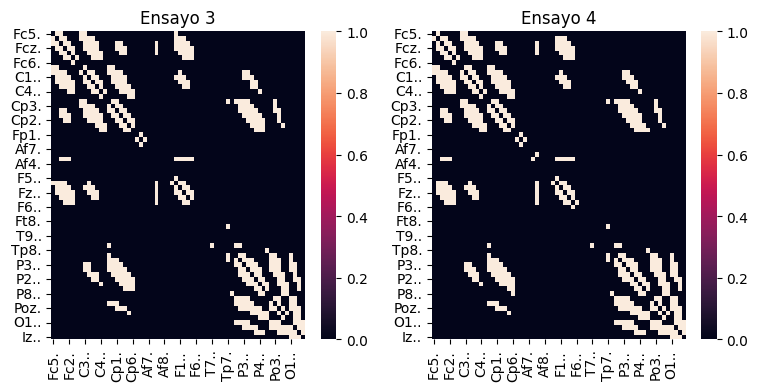

In [70]:
# Heatmaps
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
sns.heatmap(resultado3_df4, ax=axes[0])
axes[0].set_title("Ensayo 3")
sns.heatmap(resultado4_df4, ax=axes[1])
axes[1].set_title("Ensayo 4")

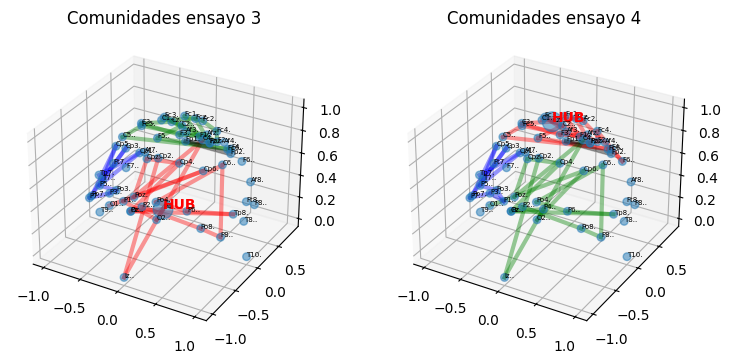

In [68]:
# Comunidades
fig = plt.figure(figsize=(9, 4))
axes = [
    fig.add_subplot(1, 2, 1, projection='3d'),  
    fig.add_subplot(1, 2, 2, projection='3d')  
]

hub3 = betwenness_3[0]
grafo_comunidades(communities_3, hub3, eeg_coords, axes[0])
axes[0].set_title("Comunidades ensayo 3")

hub4 = betwenness_4[0]
grafo_comunidades(communities_4, hub4, eeg_coords, axes[1])
axes[1].set_title("Comunidades ensayo 4")

plt.show()

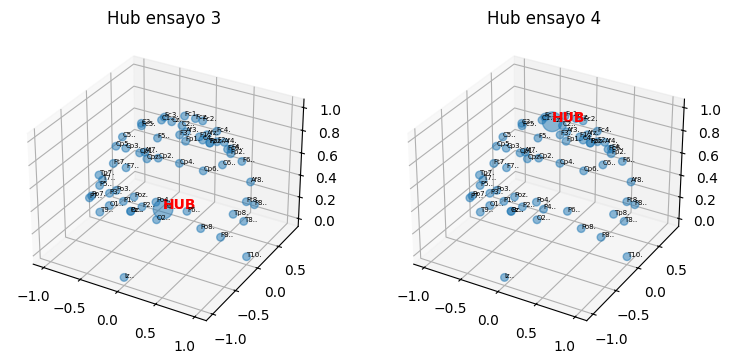

In [75]:
# Hub
fig = plt.figure(figsize=(9, 4))
axes = [
    fig.add_subplot(1, 2, 1, projection='3d'),   
    fig.add_subplot(1, 2, 2, projection='3d')   
]

hub3 = betwenness_3[0]
grafo3D(eeg_coords, hub3, axes[0])
axes[0].set_title("Hub ensayo 3")

hub4 = betwenness_4[0]
grafo3D(eeg_coords, hub4, axes[1])
axes[1].set_title("Hub ensayo 4")

plt.show()

Text(0.5, 1.0, 'Grafo 2D - Ensayo 4')

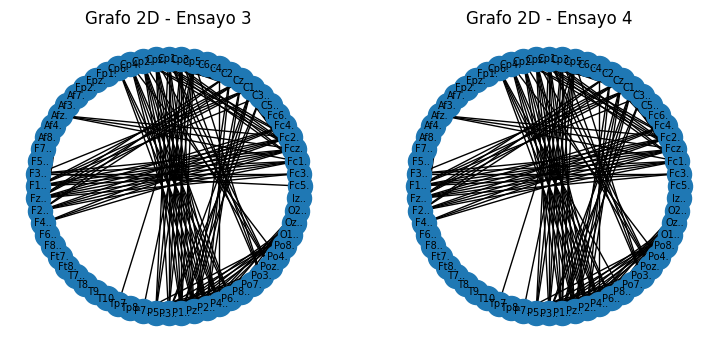

In [81]:
# Grafo 2D
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
ensayo3_grafo = grafo2D(resultado3_df4, axes[0])
axes[0].set_title('Grafo 2D - Ensayo 3')
ensayo4_grafo = grafo2D(resultado4_df4, axes[1])
axes[1].set_title('Grafo 2D - Ensayo 4')

### Ensayo 5 vs Ensayo 6

Text(0.5, 1.0, 'Ensayo 6')

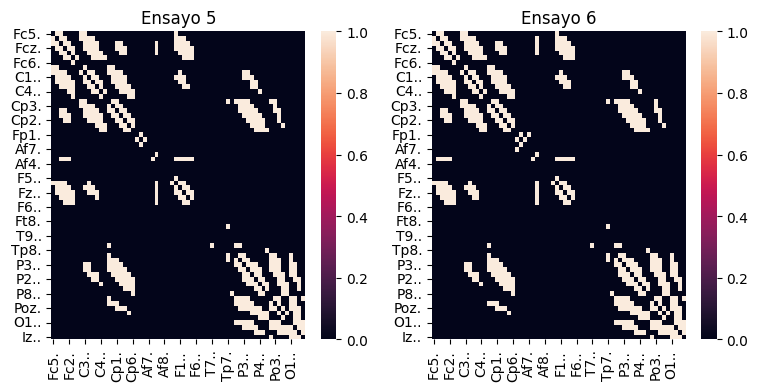

In [69]:
# Heatmaps
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
sns.heatmap(resultado5_df4, ax=axes[0])
axes[0].set_title("Ensayo 5")
sns.heatmap(resultado6_df4, ax=axes[1])
axes[1].set_title("Ensayo 6")

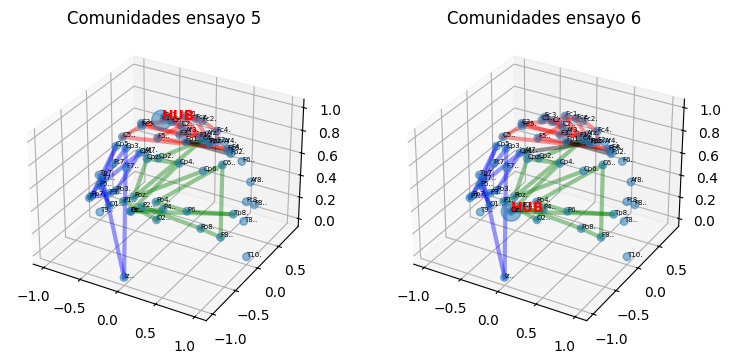

In [66]:
# Comunidades
fig = plt.figure(figsize=(9, 4))
axes = [
    fig.add_subplot(1, 2, 1, projection='3d'), 
    fig.add_subplot(1, 2, 2, projection='3d')   
]

hub5 = betwenness_5[0]
grafo_comunidades(communities_5, hub5, eeg_coords, axes[0])
axes[0].set_title("Comunidades ensayo 5")

hub6 = betwenness_6[0]
grafo_comunidades(communities_6, hub6, eeg_coords, axes[1])
axes[1].set_title("Comunidades ensayo 6")

plt.show()

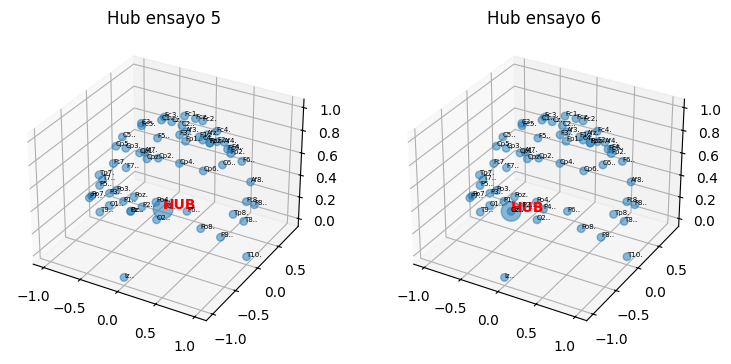

In [76]:
# Hub
fig = plt.figure(figsize=(9, 4))
axes = [
    fig.add_subplot(1, 2, 1, projection='3d'),  
    fig.add_subplot(1, 2, 2, projection='3d')   
]

hub5 = betwenness_5[0]
grafo3D(eeg_coords, hub3, axes[0])
axes[0].set_title("Hub ensayo 5")

hub6 = betwenness_6[0]
grafo3D(eeg_coords, hub6, axes[1])
axes[1].set_title("Hub ensayo 6")

plt.show()

Text(0.5, 1.0, 'Grafo 2D - Ensayo 6')

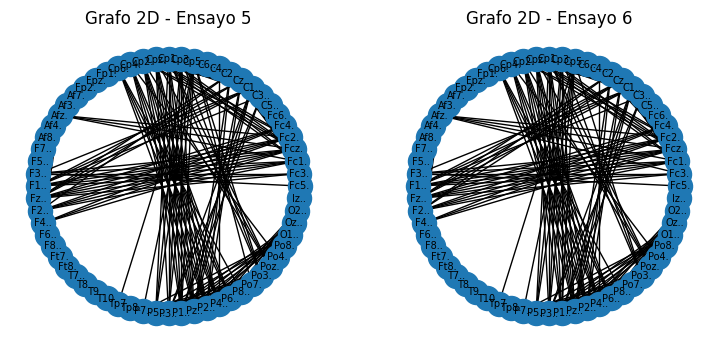

In [80]:
# Grafo 2D
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
ensayo5_grafo = grafo2D(resultado5_df4, axes[0])
axes[0].set_title('Grafo 2D - Ensayo 5')
ensayo6_grafo = grafo2D(resultado6_df4, axes[1])
axes[1].set_title('Grafo 2D - Ensayo 6')